# Sample DataSet

## Training DataSet

In [28]:
import pandas as pd

pizza = {'diameter': [6, 8, 10, 14, 18],
        'n_topping': [2, 1, 0, 2, 0],
        'harga': [7, 9, 13, 17.5, 18]}

train_pizza_df = pd.DataFrame(pizza)
train_pizza_df

,diameter,n_topping,harga
0,6,2,7.0
1,8,1,9.0
2,10,0,13.0
3,14,2,17.5
4,18,0,18.0


## Testing Dataset

In [20]:
pizza = {'diameter': [8, 9, 11, 16, 12],
        'n_topping': [2, 0, 2, 2, 0],
        'harga': [11, 8.5, 15, 18, 11]}

test_pizza_df = pd.DataFrame(pizza)
test_pizza_df

,diameter,n_topping,harga
0,8,2,11.0
1,9,0,8.5
2,11,2,15.0
3,16,2,18.0
4,12,0,11.0


## Preprocessing Dataset

In [29]:
import numpy as np

X_train = np.array(train_pizza_df[['diameter', 'n_topping']])
y_train = np.array(train_pizza_df['harga'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[ 6  2]
 [ 8  1]
 [10  0]
 [14  2]
 [18  0]]

y_train: [ 7.   9.  13.  17.5 18. ]


In [27]:
X_test = np.array(test_pizza_df[['diameter', 'n_topping']])
y_test = np.array(test_pizza_df['harga'])

print(f'X_test:\n{X_test}\n')
print(f'y_test: {y_test}')

X_test:
[[ 8  2]
 [ 9  0]
 [11  2]
 [16  2]
 [12  0]]

y_test: [11.   8.5 15.  18.  11. ]


## Multiple Linear Regression

### Perbedaan Multiple dan simple Linear Regression di jumlah features yang di gunakan
### pada simple linear regression hanya 1 featues atau explanatory variables
### kalau di multiple linear regression menggunkn lebih dari 1 featuresnya

#### Multiple Linear Regression dari simple Linear Regression yang memungkinkan untuk menggunakan beberapa explanotry variables

#### y = a + B1 X1 + B2 X2 + .... + BnXn

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'r_squared:{r2_score(y_test, y_pred)}')

r_squared:0.7701677731318468


#### bentuk pengembangan lain dari simple linear regression

## Polynomial Regression

#### Polynomial Regression memodelkan hubungan antara independent variable X dan dependent variable y sebagai derajat polynomial dalam X

## Preproccessing DataSet

In [40]:
X_train = np.array(train_pizza_df['diameter']).reshape(-1, 1)
y_train = np.array(train_pizza_df['harga'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

y_train: [ 7.   9.  13.  17.5 18. ]


## Polynomial Regression: Quadratic

#### y = a + B1x + B2x pangkat 2 (B = beta)

#### Polynomial Features

In [42]:
from sklearn.preprocessing import PolynomialFeatures

quadratic_feature = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_feature.fit_transform(X_train)

print(f'X_train_quadratic:\n{X_train_quadratic}\n')

# jadi cara itungnya 6 pangkat 0 (buat kiri) = 1, 6 pangkat 1 (buat tengah) = 6, 6 pangkat 2 = 36
# sampai seterusnya

X_train_quadratic:
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]



## Training model

In [43]:
model = LinearRegression()
model.fit(X_train_quadratic, y_train)

LinearRegression()

## Visualisasi Model

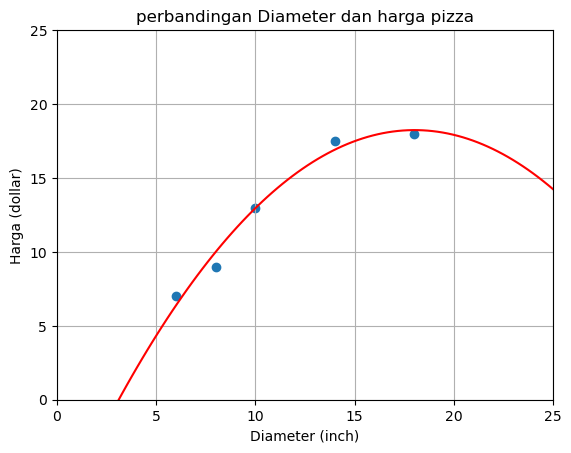

In [48]:
import matplotlib.pyplot as plt

X_vis = np.linspace(0, 25, 100).reshape(-1, 1)
X_vis_quadratic = quadratic_feature.transform(X_vis)
y_vis_quadratic = model.predict(X_vis_quadratic)

plt.scatter(X_train, y_train)
plt.plot(X_vis, y_vis_quadratic, '-r')

plt.title('perbandingan Diameter dan harga pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25) # batasan limit xlim 
plt.ylim(0, 25)
plt.grid(True)
plt.show()

## Polynomial Regression: Quadratic vs cubic

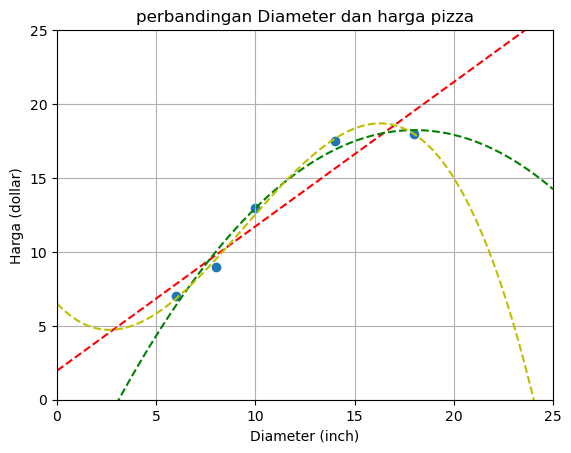

In [49]:
# Training model
plt.scatter(X_train, y_train)

# Linear
model = LinearRegression()
model.fit(X_train, y_train)
X_vis = np.linspace(0, 25, 100).reshape(-1, 1)
y_vis = model.predict(X_vis)
plt.plot(X_vis, y_vis, '--r', label='linear')

# Quadratic
quadratic_feature = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_feature.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_quadratic, y_train)
X_vis_quadratic = quadratic_feature.transform(X_vis)
y_vis = model.predict(X_vis_quadratic)
plt.plot(X_vis, y_vis, '--g', label='quadratic')
# Kapan digunakan: Ketika data memiliki pola yang naik-turun atau bentuk melengkung, seperti grafik parabola.

# cubic
cubic_feature = PolynomialFeatures(degree=3)
X_train_cubic = cubic_feature.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_cubic, y_train)
X_vis_cubic = cubic_feature.transform(X_vis)
y_vis = model.predict(X_vis_cubic)
plt.plot(X_vis, y_vis, '--y', label='cubic')

# Kapan digunakan: Ketika data memiliki lebih dari satu titik perubahan arah (misalnya, naik lalu turun lalu naik lagi) 
# atau lebih banyak pola yang kompleks daripada quadratic.

plt.title('perbandingan Diameter dan harga pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25) # batasan limit xlim 
plt.ylim(0, 25)
plt.grid(True)
plt.show()

#### Jadi, quadratic dan cubic regression berguna ketika data menunjukkan hubungan yang tidak linier, dan kamu bisa memilih antara keduanya tergantung pada seberapa kompleks hubungan tersebut.